# Mini Proyecto : Aprendizaje Supervisado
**Inteligencia Artificial**

In [1]:
from IPython.core.display import Image, display
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import multivariate_normal, norm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as LR

from warnings import filterwarnings
filterwarnings('ignore')

# Configuración de las figuras matplotlib
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams.update({'font.size': 12})

C:\Users\agusd\AppData\Local\Temp\ipykernel_6064\539747102.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import Image, display


### Ejercicio de aprendizaje supervisado (prediciendo mora)
Este conjunto de datos clasifica a las personas descritas por un conjunto de atributos como buenos o malos según su riesgo crediticio.

### Carga de datos
El dataset y su descripción se obtiene de la página:
 https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)
 


In [2]:
def load_data():
  data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data',
                     delimiter=" ",
                     header=None)
  data.columns=['existingchecking',
                'duration',
                'credithistory',
                'purpose',
                'creditamount',
                'savings',
                'employmentsince',
                'installmentrate',
                'statussex',
                'otherdebtors',
                'residencesince',
                'property',
                'age',
                'otherinstallmentplans',
                'housing',
                'existingcredits',
                'job',
                'peopleliable',
                'telephone',
                'foreignworker',
                'target'
                ]
  data.loc[:,'target'] = data['target'].replace([1,2],[1,0])
  return data

# Ejercicio
---

Como parte del equipo de riesgos de una entidad financiera se le solicita utilizando la base de datos *german*, que desarrolle el mejor modelo que me permita clasificar a los clientes en riesgosos y no riesgosos desde el punto de vista de la probabilidad de caer en mora.

Para esto tenga en cuenta lo siguiente:

1) Realice un análisis explortorio tanto visual como formal y extraiga conclusiones

2) Realice una preparación y preprocesado de los datos de acuerdo a lo observado. Por ej. analice nulos, outliers, codifique de forma adecuado las variables categóricas, analice el desbalanceo de clases, etc.

3) Compare las prestaciones en un conjunto de test de los siguientes clasificadores en términos de área bajo la curva ROC (AUC-ROC) y F1-score:

- Regresión Logística con regularización L2, validando el parámetro $C$ de regularización.
- Random Forest validando tanto el número de estimadores y el máximo número de hojas.
- XGBoost validando el el número de estimadores, la máxima profundidad del arbol y learning_rate.
- Elija algún otro algoritmo si lo considera necesario


**En todos los casos, valide el número de variables a la entrada usando el criterio de información mútua y seleccione rangos de validación adecuados para cada hiperparámetro utilizando Gridsearch y Cross Validation.
Y utilice Pipeline de sklearn para garantizar la ejecución ordenada de los distintos pasos

4) Represente también en una única gráfica la curva ROC de los cuatro clasificadores.

5) Recomiende el mejor clasificador y explique su elección


## Additional Variable Information
Attribute 1:  (qualitative)      
 Status of existing checking account
             A11 :      ... <    0 DM
	       A12 : 0 <= ... <  200 DM
	       A13 :      ... >= 200 DM / salary assignments for at least 1 year
               A14 : no checking account

Attribute 2:  (numerical)
	      Duration in month

Attribute 3:  (qualitative)
	      Credit history
	      A30 : no credits taken/ all credits paid back duly
              A31 : all credits at this bank paid back duly
	      A32 : existing credits paid back duly till now
              A33 : delay in paying off in the past
	      A34 : critical account/  other credits existing (not at this bank)

Attribute 4:  (qualitative)
	      Purpose
	      A40 : car (new)
	      A41 : car (used)
	      A42 : furniture/equipment
	      A43 : radio/television
	      A44 : domestic appliances
	      A45 : repairs
	      A46 : education
	      A47 : (vacation - does not exist?)
	      A48 : retraining
	      A49 : business
	      A410 : others

Attribute 5:  (numerical)
	      Credit amount

Attibute 6:  (qualitative)
	      Savings account/bonds
	      A61 :          ... <  100 DM
	      A62 :   100 <= ... <  500 DM
	      A63 :   500 <= ... < 1000 DM
	      A64 :          .. >= 1000 DM
              A65 :   unknown/ no savings account

Attribute 7:  (qualitative)
	      Present employment since
	      A71 : unemployed
	      A72 :       ... < 1 year
	      A73 : 1  <= ... < 4 years  
	      A74 : 4  <= ... < 7 years
	      A75 :       .. >= 7 years

Attribute 8:  (numerical)
	      Installment rate in percentage of disposable income

Attribute 9:  (qualitative)
	      Personal status and sex
	      A91 : male   : divorced/separated
	      A92 : female : divorced/separated/married
              A93 : male   : single
	      A94 : male   : married/widowed
	      A95 : female : single

Attribute 10: (qualitative)
	      Other debtors / guarantors
	      A101 : none
	      A102 : co-applicant
	      A103 : guarantor

Attribute 11: (numerical)
	      Present residence since

Attribute 12: (qualitative)
	      Property
	      A121 : real estate
	      A122 : if not A121 : building society savings agreement/ life insurance
              A123 : if not A121/A122 : car or other, not in attribute 6
	      A124 : unknown / no property

Attribute 13: (numerical)
	      Age in years

Attribute 14: (qualitative)
	      Other installment plans 
	      A141 : bank
	      A142 : stores
	      A143 : none

Attribute 15: (qualitative)
	      Housing
	      A151 : rent
	      A152 : own
	      A153 : for free

Attribute 16: (numerical)
              Number of existing credits at this bank

Attribute 17: (qualitative)
	      Job
	      A171 : unemployed/ unskilled  - non-resident
	      A172 : unskilled - resident
	      A173 : skilled employee / official
	      A174 : management/ self-employed/
		     highly qualified employee/ officer

Attribute 18: (numerical)
	      Number of people being liable to provide maintenance for

Attribute 19: (qualitative)
	      Telephone
	      A191 : none
	      A192 : yes, registered under the customers name

Attribute 20: (qualitative)
	      foreign worker
	      A201 : yes
	      A202 : no

**Muestre, mediante gráficos y explicaciones acordes, las conclusiones a las que ha arribado durante y luego del aprendizaje.
Documente cada uno de los pasos del análisis para demostrar su entendimiento sobre el tema.**



In [3]:
data = load_data()
print("Cargadas {0:d} observaciones con {1:d} columnas\n".format(len(data), len(data.columns)))

Cargadas 1000 observaciones con 21 columnas


In [4]:
df = data.copy()

In [5]:
df

,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,...,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,0


# 1. Análisis exploratorio

In [6]:
print(f'El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas')

El dataset tiene 1000 filas y 21 columnas


### 1.1 Medidas estadisticas

In [7]:
df.describe()

,duration,creditamount,installmentrate,residencesince,age,existingcredits,peopleliable,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.700000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   existingchecking       1000 non-null   object
 1   duration               1000 non-null   int64 
 2   credithistory          1000 non-null   object
 3   purpose                1000 non-null   object
 4   creditamount           1000 non-null   int64 
 5   savings                1000 non-null   object
 6   employmentsince        1000 non-null   object
 7   installmentrate        1000 non-null   int64 
 8   statussex              1000 non-null   object
 9   otherdebtors           1000 non-null   object
 10  residencesince         1000 non-null   int64 
 11  property               1000 non-null   object
 12  age                    1000 non-null   int64 
 13  otherinstallmentplans  1000 non-null   object
 14  housing                1000 non-null   object
 15  existingcredits       

### 1.2 Nulos

In [9]:
df.isnull().sum()

existingchecking         0
duration                 0
credithistory            0
purpose                  0
creditamount             0
savings                  0
employmentsince          0
installmentrate          0
statussex                0
otherdebtors             0
residencesince           0
property                 0
age                      0
otherinstallmentplans    0
housing                  0
existingcredits          0
job                      0
peopleliable             0
telephone                0
foreignworker            0
target                   0
dtype: int64

### 1.3 Outliers

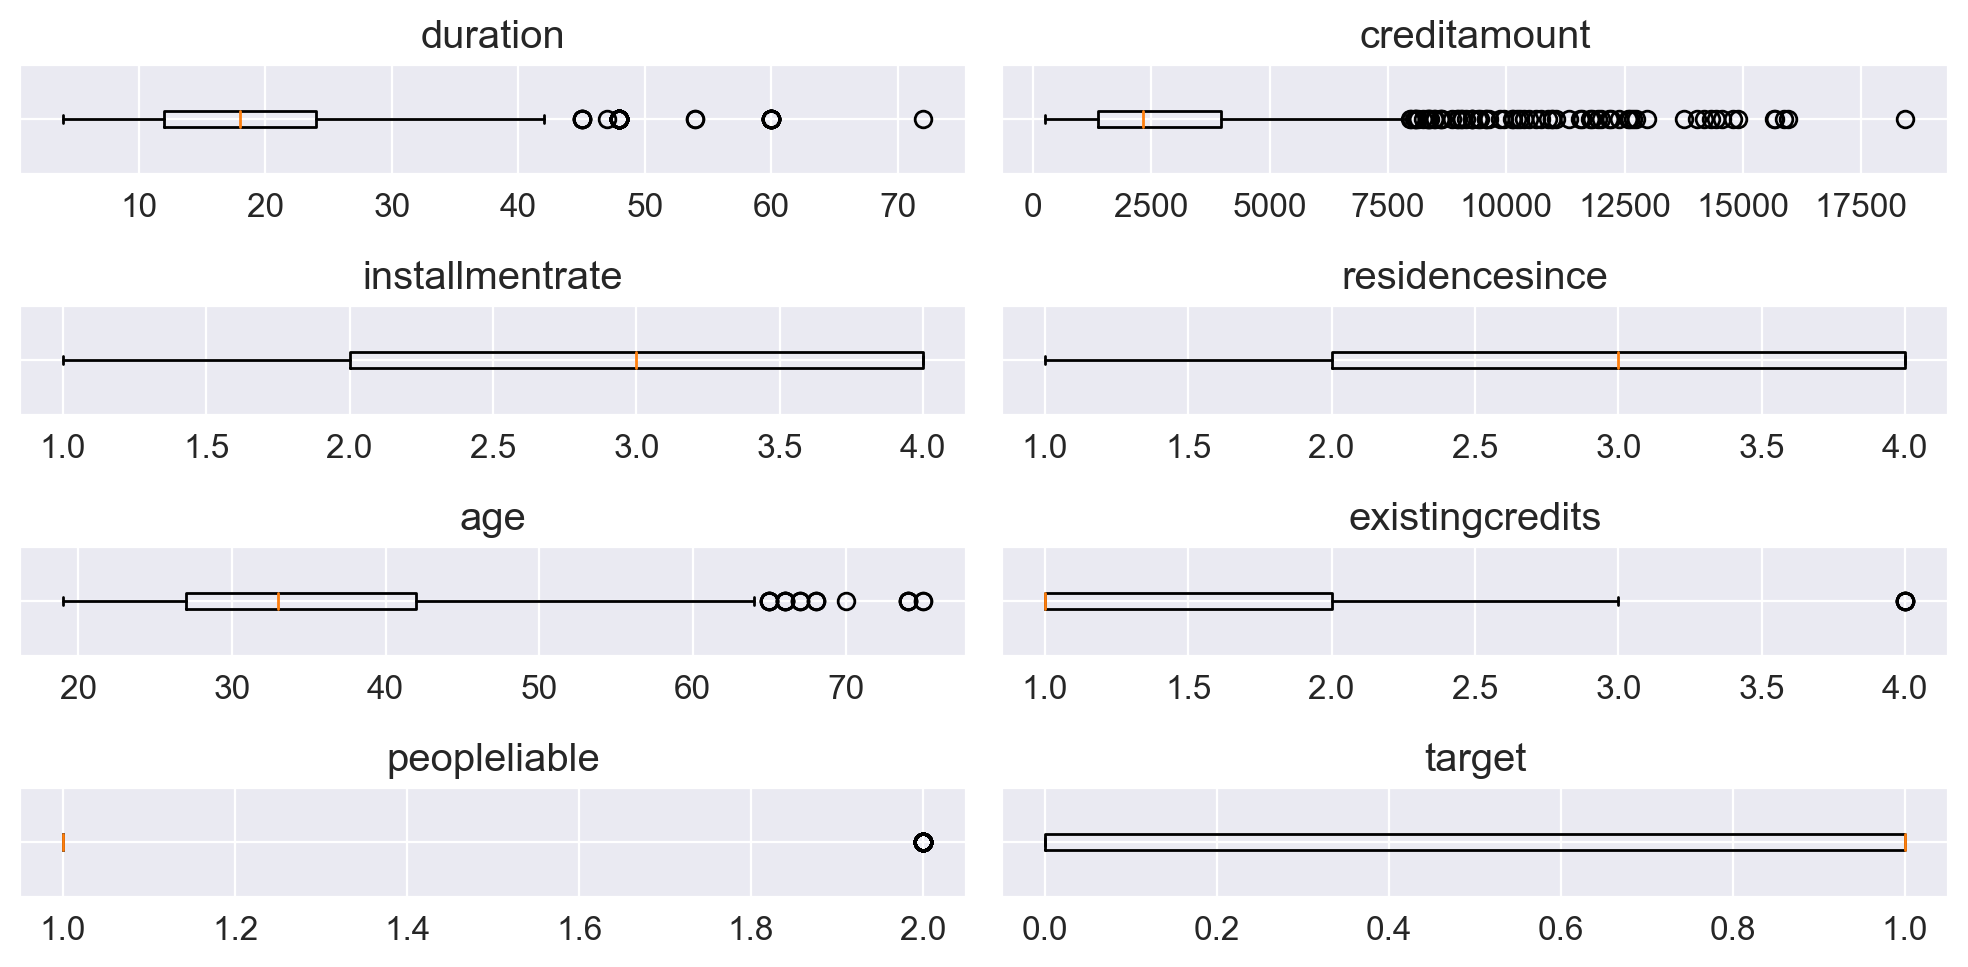

In [11]:
#Numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

fig, axes = plt.subplots(4, 2, figsize=(10,5))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    axes[i].boxplot(df[col], vert=False)
    axes[i].set_title(col)
    #remove y axis label
    axes[i].set_yticklabels([])
    
plt.tight_layout()
plt.show()

In [20]:
df

,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,...,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,0
